In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import time
from binarization import binarization_choice

In [3]:
def rescaleFrame(frame, scale = 0.75):
    height = int(frame.shape[0] * scale)
    width = int(frame.shape[1] * scale)

    return cv.resize(frame, (width, height), interpolation=cv.INTER_AREA)

In [4]:
def S_thresholder(S, thresh=(0, 255)):

    S_threshold = S * 0
    S_threshold[(S >= thresh[0]) & (S <= thresh[1])] = 1
    
    return S_threshold

In [101]:
def abs_sobel_thresh(img, orient = 'x', sobel_kernel = 3, thresh = (0,255)):
    if orient == "x":
        sobel = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = sobel_kernel)
    elif orient == "y":
        sobel = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = sobel_kernel)


    abs_sobel = np.abs(sobel)

    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))


    sbinary = scaled_sobel * 0
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel < thresh[1])] = 1

    return sbinary

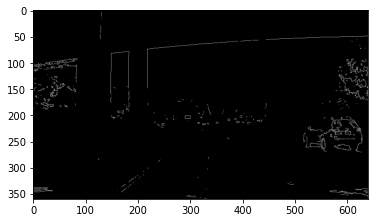

In [137]:
plt.imshow(canny_eq, "gray")

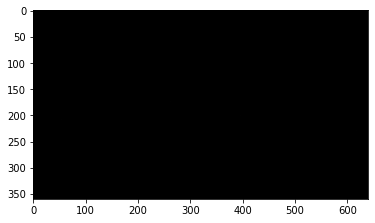

In [142]:
plt.imshow(abs_sobel_thresh(gray, "x", 3, (30, 100)), cmap = "gray")
plt.imshow(sobelx)

In [ ]:
def gray_thresh(gray, threshmin, threshmax):
    binary = gray * 0
    binary[(gray > threshmin) & (gray < threshmax)] == 1
    
    return binary


In [211]:
parameter = 255
255 * (parameter / 255)

255.0

In [231]:
type(frame[0, 0, 0])

numpy.uint8

In [232]:
def HLS_equlization(frame, H = 255, L = 255 ,S = 255):
    frame = cv.cvtColor(frame, cv.COLOR_BGR2HLS)
    H_eq = np.uint8(cv.equalizeHist(frame[:,:,0]) * (H / 255))
    L_eq = np.uint8(cv.equalizeHist(frame[:,:,1]) * (L / 255))
    S_eq = np.uint8(cv.equalizeHist(frame[:,:,2]) * (S / 255))

    return cv.merLe((H_eq, L_eq, S_eq))

In [233]:
def BGR_equlization(frame, B = 255, G = 255 ,R = 255):
    B_eq = np.uint8(cv.equalizeHist(frame[:,:,0]) * (B / 255))
    G_eq = np.uint8(cv.equalizeHist(frame[:,:,1]) * (G / 255))
    R_eq = np.uint8(cv.equalizeHist(frame[:,:,2]) * (R / 255))

    return cv.merge((B_eq, G_eq, R_eq))

In [234]:
capture = cv.VideoCapture("Project_data/challenge_video.mp4")
time.sleep(2)

while (True):
    ret, frame = capture.read()
    frame_equlized = BGR_equlization(frame, 200, 255, 255)

    wider_frame = frame * 0

    # Frames
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    gray_equalized = cv.equalizeHist(gray)

    S = cv.cvtColor(frame_equlized, cv.COLOR_BGR2HLS)[:,:,2]
    
    sobelx = abs_sobel_thresh(gray_equalized, "x", 3, (30, 100)) * 255
    
    sthresh = S_thresholder(S, (150, 255)) * 255

    canny = cv.Canny(gray, 100, 200)

    canny_eq = cv.Canny(gray_equalized, 200, 230)

    canny_S = cv.Canny(S, 100, 150)

    canny_S = cv.morphologyEx(canny_S, cv.MORPH_CLOSE, np.ones((5,5)))

    binary = S * 0
    binary[(sthresh == 255) | (canny_S == 255) | (sobelx == 255)] = 255

    closing = cv.morphologyEx(binary, cv.MORPH_CLOSE, np.ones((7,7)))
    

    # Rescaling
    frame = rescaleFrame(frame, 0.5)

    frame_equlized = rescaleFrame(frame_equlized, 0.5)

    gray = rescaleFrame(gray, 0.5)
    gray = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

    gray_equalized = rescaleFrame(gray_equalized, 0.5)
    gray_equalized = cv.cvtColor(gray_equalized, cv.COLOR_GRAY2BGR)
    
    S = rescaleFrame(S, 0.5)
    S = cv.cvtColor(S, cv.COLOR_GRAY2BGR)

    sthresh = rescaleFrame(sthresh, 0.5)
    sthresh = cv.cvtColor(sthresh, cv.COLOR_GRAY2BGR)

    canny = rescaleFrame(canny, 0.5)
    canny = cv.cvtColor(canny, cv.COLOR_GRAY2BGR)

    canny_eq = rescaleFrame(canny_eq, 0.5)
    canny_eq = cv.cvtColor(canny_eq, cv.COLOR_GRAY2BGR)


    canny_S = rescaleFrame(canny_S, 0.5)
    canny_S = cv.cvtColor(canny_S, cv.COLOR_GRAY2BGR)


    closing = rescaleFrame(closing, 0.5)
    closing = cv.cvtColor(closing, cv.COLOR_GRAY2BGR)

    sobelx = rescaleFrame(sobelx, 0.5)
    sobelx = cv.cvtColor(sobelx, cv.COLOR_GRAY2BGR)


    # Previewing
    # [0, 0]
    wider_frame[0:wider_frame.shape[0] // 2, 0 : wider_frame.shape[1] // 2] = frame
    # [0, 1]
    wider_frame[0:wider_frame.shape[0] // 2, wider_frame.shape[1] // 2 : wider_frame.shape[1]] = frame_equlized
    # [1, 0]
    wider_frame[wider_frame.shape[0] // 2: wider_frame.shape[0], 0 : wider_frame.shape[1] // 2] = S
    # [1, 1]
    wider_frame[wider_frame.shape[0] // 2: wider_frame.shape[0], wider_frame.shape[1] // 2 : wider_frame.shape[1]] = sthresh

    cv.imshow("Video", wider_frame)

    if cv.waitKey(16) & 0xFF == ord('q'):
        break

capture.release()
cv.destroyAllWindows()